In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Train house 1 Test house 2

In [26]:
dico_accuracy = {'MinMaxScaler et XGBClassifier': 0.7108033743114573,
 'MinMaxScaler et HistGradientBoostingClassifier': 0.7450479992072901,
 'MinMaxScaler et LGBMClassifier': 0.7426873342354882,
 'MinMaxScaler et CatBoostClassifier': 0.7084894042156649,
 'StandardScaler et XGBClassifier': 0.7117892980123977,
 'StandardScaler et HistGradientBoostingClassifier': 0.7314774387456064,
 'StandardScaler et LGBMClassifier': 0.7390204996020825,
 'StandardScaler et CatBoostClassifier': 0.7120378471161961,
 'QuantileTransformer et XGBClassifier': 0.7215965088410498,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7475531609213891,
 'QuantileTransformer et LGBMClassifier': 0.7420758887330963,
 'QuantileTransformer et CatBoostClassifier': 0.7078902758656063,
 'RobustScaler et XGBClassifier': 0.6762864851976323,
 'RobustScaler et HistGradientBoostingClassifier': 0.706439425623611,
 'RobustScaler et LGBMClassifier': 0.7071760648683747,
 'RobustScaler et CatBoostClassifier': 0.6496080847581858,
 'Normalizer et XGBClassifier': 0.6245526070172104,
 'Normalizer et HistGradientBoostingClassifier': 0.6438868594184576,
 'Normalizer et LGBMClassifier': 0.5984869389468173,
 'Normalizer et CatBoostClassifier': 0.6422442660438722,
 'MaxAbsScaler et XGBClassifier': 0.7019874184884869,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.7258154092723155,
 'MaxAbsScaler et LGBMClassifier': 0.7309823627570493,
 'MaxAbsScaler et CatBoostClassifier': 0.6815297314915942,
 'PowerTransformer et XGBClassifier': 0.7166652357934976,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7378900791588451,
 'PowerTransformer et LGBMClassifier': 0.7431741375097917,
 'PowerTransformer et CatBoostClassifier': 0.7176243191326371}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.7099058416150578,
 'StandardScaler et VotingClassifier': 0.7270804549211243,
 'QuantileTransformer et VotingClassifier': 0.7392258515264668,
 'RobustScaler et VotingClassifier': 0.689652536113128,
 'Normalizer et VotingClassifier': 0.5925677763158101,
 'MaxAbsScaler et VotingClassifier': 0.737601329257946,
 'PowerTransformer et VotingClassifier': 0.7479794918521004}

dico_accuracy.update(dico_accuracy_v)

In [28]:
dico_fscore = {'MinMaxScaler et XGBClassifier': 0.6843545127531847,
 'MinMaxScaler et HistGradientBoostingClassifier': 0.7237298234575336,
 'MinMaxScaler et LGBMClassifier': 0.7207728349970046,
 'MinMaxScaler et CatBoostClassifier': 0.6796564592006893,
 'StandardScaler et XGBClassifier': 0.6960423189419419,
 'StandardScaler et HistGradientBoostingClassifier': 0.7320450462836604,
 'StandardScaler et LGBMClassifier': 0.7386024349482285,
 'StandardScaler et CatBoostClassifier': 0.6962818517429001,
 'QuantileTransformer et XGBClassifier': 0.7093369862403143,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7414617561835315,
 'QuantileTransformer et LGBMClassifier': 0.7376148462485148,
 'QuantileTransformer et CatBoostClassifier': 0.6844781534425949,
 'RobustScaler et XGBClassifier': 0.6580195137116753,
 'RobustScaler et HistGradientBoostingClassifier': 0.6957644955892331,
 'RobustScaler et LGBMClassifier': 0.6963749869117486,
 'RobustScaler et CatBoostClassifier': 0.6307486773958211,
 'Normalizer et XGBClassifier': 0.6098188384304493,
 'Normalizer et HistGradientBoostingClassifier': 0.6260830191438903,
 'Normalizer et LGBMClassifier': 0.5782348857859793,
 'Normalizer et CatBoostClassifier': 0.624778370462152,
 'MaxAbsScaler et XGBClassifier': 0.6760992240897596,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.6917536271456907,
 'MaxAbsScaler et LGBMClassifier': 0.69691182626235,
 'MaxAbsScaler et CatBoostClassifier': 0.6538077085142386,
 'PowerTransformer et XGBClassifier': 0.7021195572608617,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7312991034012991,
 'PowerTransformer et LGBMClassifier': 0.7358123998193256,
 'PowerTransformer et CatBoostClassifier': 0.6965608243236583}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.6640874511525008,
 'StandardScaler et VotingClassifier': 0.6761678789451608,
 'QuantileTransformer et VotingClassifier': 0.6928089446519758,
 'RobustScaler et VotingClassifier': 0.6435789510041812,
 'Normalizer et VotingClassifier': 0.40542073407833706,
 'MaxAbsScaler et VotingClassifier': 0.6979952514122514,
 'PowerTransformer et VotingClassifier': 0.7005731769189857}

dico_fscore.update(dico_fscore_v)

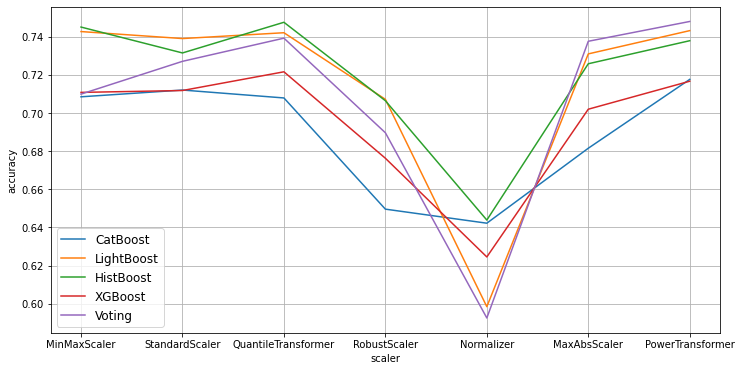

In [30]:
liste_XGBClassifier = list()
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_accuracy]:
    keys = i
    value = dico_accuracy[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
    
    if df.columns.tolist()[0] == 'XGBClassifier':
        liste_XGBClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_XGBClassifier = pd.concat(liste_XGBClassifier)
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_XGBClassifier, label='XGBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("accuracy")

plt.grid()
plt.legend(prop={'size': 12})

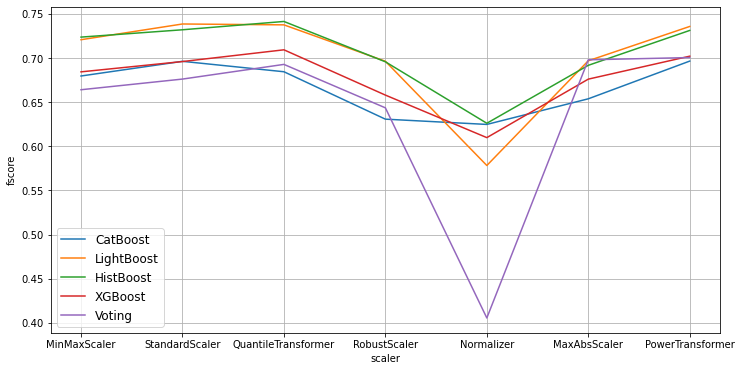

In [31]:
liste_XGBClassifier = list()
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_fscore]:
    keys = i
    value = dico_fscore[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
    
    if df.columns.tolist()[0] == 'XGBClassifier':
        liste_XGBClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_XGBClassifier = pd.concat(liste_XGBClassifier)
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_XGBClassifier, label='XGBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("fscore")

plt.grid()
plt.legend(prop={'size': 12})

# Train house 2 Test house 1

In [32]:
dico_accuracy = {'MinMaxScaler et XGBClassifier': 0.6909438029386072,
 'MinMaxScaler et HistGradientBoostingClassifier': 0.7151622601148908,
 'MinMaxScaler et LGBMClassifier': 0.7188439486300456,
 'MinMaxScaler et CatBoostClassifier': 0.7133620926246258,
 'StandardScaler et XGBClassifier': 0.6721378062225456,
 'StandardScaler et HistGradientBoostingClassifier': 0.7469448317177633,
 'StandardScaler et LGBMClassifier': 0.7402781545960239,
 'StandardScaler et CatBoostClassifier': 0.7097670505246617,
 'QuantileTransformer et XGBClassifier': 0.7034299042263064,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7581784806374667,
 'QuantileTransformer et LGBMClassifier': 0.7600474555750891,
 'QuantileTransformer et CatBoostClassifier': 0.7174854426181175,
 'RobustScaler et XGBClassifier': 0.6876878972600914,
 'RobustScaler et HistGradientBoostingClassifier': 0.7114494024141809,
 'RobustScaler et LGBMClassifier': 0.718136858992957,
 'RobustScaler et CatBoostClassifier': 0.665419376490828,
 'Normalizer et XGBClassifier': 0.5447295455650366,
 'Normalizer et HistGradientBoostingClassifier': 0.5785894747737391,
 'Normalizer et LGBMClassifier': 0.5549618598947069,
 'Normalizer et CatBoostClassifier': 0.5866946392137367,
 'MaxAbsScaler et XGBClassifier': 0.7386671585778383,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.721347873202969,
 'MaxAbsScaler et LGBMClassifier': 0.6998352541915693,
 'MaxAbsScaler et CatBoostClassifier': 0.7133091638189663,
 'PowerTransformer et XGBClassifier': 0.6780675967499361,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7735021540063577,
 'PowerTransformer et LGBMClassifier': 0.7703250534384904,
 'PowerTransformer et CatBoostClassifier': 0.718455411989982}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.7341848223636835,
 'StandardScaler et VotingClassifier': 0.7308825386717219,
 'QuantileTransformer et VotingClassifier': 0.7333204156432247,
 'RobustScaler et VotingClassifier': 0.6903337378384207,
 'Normalizer et VotingClassifier': 0.6428943175461144,
 'MaxAbsScaler et VotingClassifier': 0.7142948274026858,
 'PowerTransformer et VotingClassifier': 0.7358658379000248}

dico_accuracy.update(dico_accuracy_v)

In [33]:
dico_fscore = {'MinMaxScaler et XGBClassifier': 0.6436030177163782,
 'MinMaxScaler et HistGradientBoostingClassifier': 0.6685247592631415,
 'MinMaxScaler et LGBMClassifier': 0.6739799088130268,
 'MinMaxScaler et CatBoostClassifier': 0.6651065159452256,
 'StandardScaler et XGBClassifier': 0.6264683408878959,
 'StandardScaler et HistGradientBoostingClassifier': 0.6969490938339212,
 'StandardScaler et LGBMClassifier': 0.6893385347072843,
 'StandardScaler et CatBoostClassifier': 0.6615631346759613,
 'QuantileTransformer et XGBClassifier': 0.6597500224429885,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7168917039087166,
 'QuantileTransformer et LGBMClassifier': 0.7190702476715295,
 'QuantileTransformer et CatBoostClassifier': 0.6730273982833012,
 'RobustScaler et XGBClassifier': 0.6422150302239176,
 'RobustScaler et HistGradientBoostingClassifier': 0.6684590784851037,
 'RobustScaler et LGBMClassifier': 0.6753959722864694,
 'RobustScaler et CatBoostClassifier': 0.6199518140498393,
 'Normalizer et XGBClassifier': 0.26954256691725526,
 'Normalizer et HistGradientBoostingClassifier': 0.40957158296643753,
 'Normalizer et LGBMClassifier': 0.3533262241821928,
 'Normalizer et CatBoostClassifier': 0.45924763530440105,
 'MaxAbsScaler et XGBClassifier': 0.701012130755604,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.6805946817667076,
 'MaxAbsScaler et LGBMClassifier': 0.6561052747277307,
 'MaxAbsScaler et CatBoostClassifier': 0.6699519724623415,
 'PowerTransformer et XGBClassifier': 0.6327000319177326,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7286874691990334,
 'PowerTransformer et LGBMClassifier': 0.7248773819838402,
 'PowerTransformer et CatBoostClassifier': 0.6710483696133469}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.7054275830492627,
 'StandardScaler et VotingClassifier': 0.723226647450793,
 'QuantileTransformer et VotingClassifier': 0.7188158153480965,
 'RobustScaler et VotingClassifier': 0.671117384384712,
 'Normalizer et VotingClassifier': 0.625263433802564,
 'MaxAbsScaler et VotingClassifier': 0.6803720073758908,
 'PowerTransformer et VotingClassifier': 0.7213801895984366}

dico_fscore.update(dico_fscore_v)

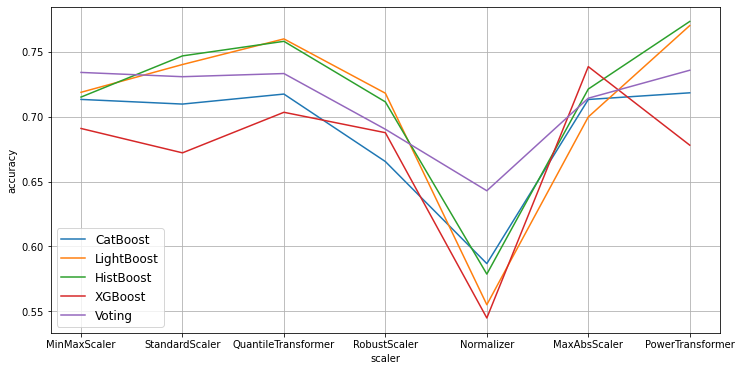

In [34]:
liste_XGBClassifier = list()
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_accuracy]:
    keys = i
    value = dico_accuracy[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
    
    if df.columns.tolist()[0] == 'XGBClassifier':
        liste_XGBClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_XGBClassifier = pd.concat(liste_XGBClassifier)
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_XGBClassifier, label='XGBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("accuracy")

plt.grid()
plt.legend(prop={'size': 12})

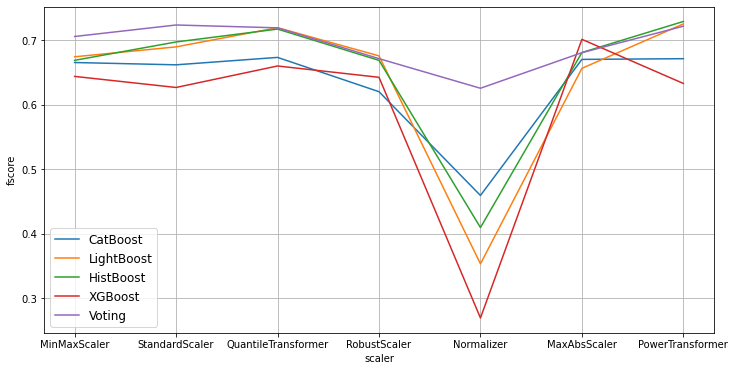

In [35]:
liste_XGBClassifier = list()
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_fscore]:
    keys = i
    value = dico_fscore[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
    
    if df.columns.tolist()[0] == 'XGBClassifier':
        liste_XGBClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_XGBClassifier = pd.concat(liste_XGBClassifier)
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_XGBClassifier, label='XGBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("fscore")

plt.grid()
plt.legend(prop={'size': 12})

# Train house 2 Test house 1 - la nuit

In [36]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.8420638448858099,
 'MinMaxScaler et LGBMClassifier': 0.8410074028258306,
 'MinMaxScaler et CatBoostClassifier': 0.8515723756692503,
 'StandardScaler et HistGradientBoostingClassifier': 0.8331373788860694,
 'StandardScaler et LGBMClassifier': 0.8381274523068597,
 'StandardScaler et CatBoostClassifier': 0.8503226483395415,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.8611609817787215,
 'QuantileTransformer et LGBMClassifier': 0.8561692516270478,
 'QuantileTransformer et CatBoostClassifier': 0.8525796680463553,
 'RobustScaler et HistGradientBoostingClassifier': 0.7821962176833932,
 'RobustScaler et LGBMClassifier': 0.789331757598182,
 'RobustScaler et CatBoostClassifier': 0.7883139725921487,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.8331583641439257,
 'MaxAbsScaler et LGBMClassifier': 0.8239154625454566,
 'MaxAbsScaler et CatBoostClassifier': 0.8426271333861647,
 'PowerTransformer et HistGradientBoostingClassifier': 0.847301323451854,
 'PowerTransformer et LGBMClassifier': 0.8516894513183436,
 'PowerTransformer et CatBoostClassifier': 0.8531098219290422}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.8445113886442143,
 'StandardScaler et VotingClassifier': 0.8395511363793251,
 'QuantileTransformer et VotingClassifier': 0.8604099304449151,
 'RobustScaler et VotingClassifier': 0.7849298236409975,
 'MaxAbsScaler et VotingClassifier': 0.7315687308613068,
 'PowerTransformer et VotingClassifier': 0.8359427765152875}

dico_accuracy.update(dico_accuracy_v)

In [37]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.5442611657107284,
 'MinMaxScaler et LGBMClassifier': 0.5425376171473145,
 'MinMaxScaler et CatBoostClassifier': 0.5623187831431887,
 'StandardScaler et HistGradientBoostingClassifier': 0.5107706539797614,
 'StandardScaler et LGBMClassifier': 0.5266017385705087,
 'StandardScaler et CatBoostClassifier': 0.5465561629662348,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.5814176031336422,
 'QuantileTransformer et LGBMClassifier': 0.5655245847114692,
 'QuantileTransformer et CatBoostClassifier': 0.5482075744434808,
 'RobustScaler et HistGradientBoostingClassifier': 0.38460304534891315,
 'RobustScaler et LGBMClassifier': 0.40768686792401015,
 'RobustScaler et CatBoostClassifier': 0.39061547353685727,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.5268685118112622,
 'MaxAbsScaler et LGBMClassifier': 0.5134207459323955,
 'MaxAbsScaler et CatBoostClassifier': 0.5482181490118192,
 'PowerTransformer et HistGradientBoostingClassifier': 0.545028474890324,
 'PowerTransformer et LGBMClassifier': 0.5585528933412546,
 'PowerTransformer et CatBoostClassifier': 0.5617012968243644}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.5518071773717795,
 'StandardScaler et VotingClassifier': 0.5260214626597496,
 'QuantileTransformer et VotingClassifier': 0.5792693494159648,
 'RobustScaler et VotingClassifier': 0.396944657429213,
 'MaxAbsScaler et VotingClassifier': 0.30976207048423504,
 'PowerTransformer et VotingClassifier': 0.5361649616906626}

dico_fscore.update(dico_fscore_v)

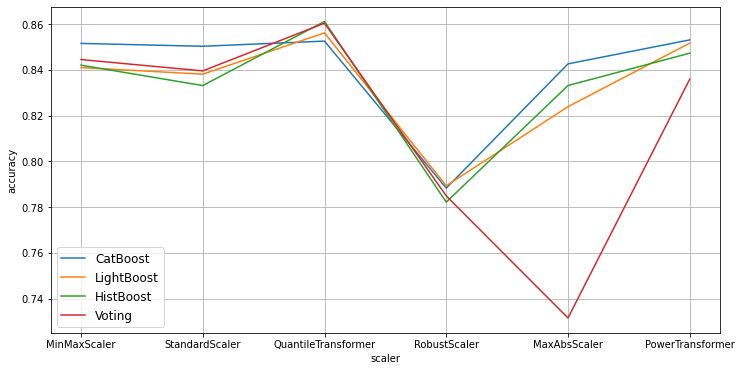

In [38]:
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_accuracy]:
    keys = i
    value = dico_accuracy[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
        
    if df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("accuracy")

plt.grid()
plt.legend(prop={'size': 12})

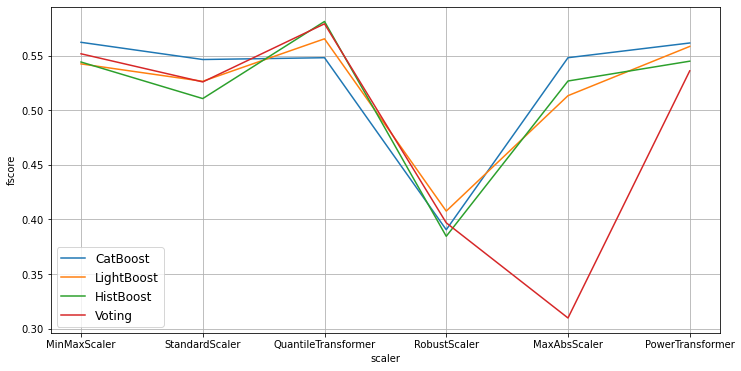

In [39]:
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_fscore]:
    keys = i
    value = dico_fscore[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
        
    if df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("fscore")

plt.grid()
plt.legend(prop={'size': 12})

# Train house 2 Test house 1 - le jour

In [40]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.6769120920729701,
 'MinMaxScaler et LGBMClassifier': 0.6769165012756374,
 'MinMaxScaler et CatBoostClassifier': 0.6339309088965034,
 'StandardScaler et HistGradientBoostingClassifier': 0.6667954521279088,
 'StandardScaler et LGBMClassifier': 0.6806668037193829,
 'StandardScaler et CatBoostClassifier': 0.6406665171212095,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.6869501930955193,
 'QuantileTransformer et LGBMClassifier': 0.6893860019940619,
 'QuantileTransformer et CatBoostClassifier': 0.6697780021572024,
 'RobustScaler et HistGradientBoostingClassifier': 0.6894245825174012,
 'RobustScaler et LGBMClassifier': 0.696660910820018,
 'RobustScaler et CatBoostClassifier': 0.672105785590395,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.674222754021055,
 'MaxAbsScaler et LGBMClassifier': 0.6729239682603546,
 'MaxAbsScaler et CatBoostClassifier': 0.6457382024893256,
 'PowerTransformer et HistGradientBoostingClassifier': 0.6818063070337255,
 'PowerTransformer et LGBMClassifier': 0.6976645555771729,
 'PowerTransformer et CatBoostClassifier': 0.6634970929575664}

dico_accuracy_v ={'MinMaxScaler et VotingClassifier': 0.674891850525825,
 'StandardScaler et VotingClassifier': 0.6857856124410062,
 'QuantileTransformer et VotingClassifier': 0.6900765933618351,
 'RobustScaler et VotingClassifier': 0.6918749968997794,
 'MaxAbsScaler et VotingClassifier': 0.6246101300328981,
 'PowerTransformer et VotingClassifier': 0.6687024322815364}

dico_accuracy.update(dico_accuracy_v)

In [41]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.7293388431342023,
 'MinMaxScaler et LGBMClassifier': 0.7277750637748577,
 'MinMaxScaler et CatBoostClassifier': 0.6881880439646876,
 'StandardScaler et HistGradientBoostingClassifier': 0.7550182028942577,
 'StandardScaler et LGBMClassifier': 0.7610001593931749,
 'StandardScaler et CatBoostClassifier': 0.6995755327297688,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7519263399904226,
 'QuantileTransformer et LGBMClassifier': 0.7552240150224201,
 'QuantileTransformer et CatBoostClassifier': 0.7261747154232322,
 'RobustScaler et HistGradientBoostingClassifier': 0.7450982876240677,
 'RobustScaler et LGBMClassifier': 0.7585995853159405,
 'RobustScaler et CatBoostClassifier': 0.7221265251952677,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.7152264360004437,
 'MaxAbsScaler et LGBMClassifier': 0.7132079608235137,
 'MaxAbsScaler et CatBoostClassifier': 0.6924154240612899,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7464634475649247,
 'PowerTransformer et LGBMClassifier': 0.7604154178957789,
 'PowerTransformer et CatBoostClassifier': 0.7199163399054729}

dico_fscore_v ={'MinMaxScaler et VotingClassifier': 0.724364796091773,
 'StandardScaler et VotingClassifier': 0.7646689204504183,
 'QuantileTransformer et VotingClassifier': 0.7528660451770417,
 'RobustScaler et VotingClassifier': 0.7462339802789563,
 'MaxAbsScaler et VotingClassifier': 0.6778686126710748,
 'PowerTransformer et VotingClassifier': 0.7091616193003382}

dico_fscore.update(dico_fscore_v)

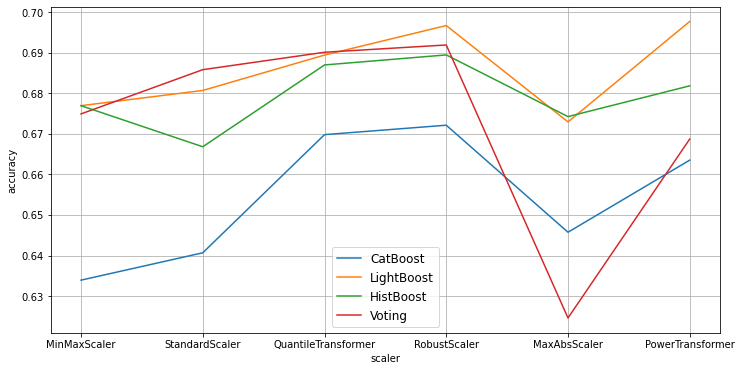

In [42]:
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_accuracy]:
    keys = i
    value = dico_accuracy[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
        
    if df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("accuracy")

plt.grid()
plt.legend(prop={'size': 12})

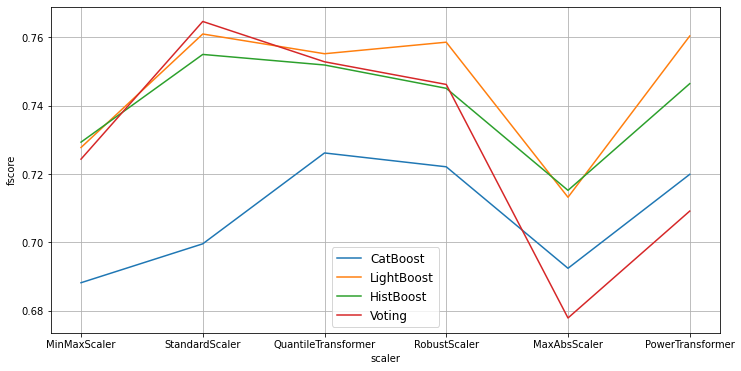

In [43]:
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_fscore]:
    keys = i
    value = dico_fscore[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
        
    if df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("fscore")

plt.grid()
plt.legend(prop={'size': 12})

# Train house 1 Test house 2 - la nuit

In [2]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.757553459134271,
 'MinMaxScaler et LGBMClassifier': 0.7626615284508538,
 'MinMaxScaler et CatBoostClassifier': 0.8322406207202742,
 'StandardScaler et HistGradientBoostingClassifier': 0.8723135360900542,
 'StandardScaler et LGBMClassifier': 0.8605986859259712,
 'StandardScaler et CatBoostClassifier': 0.8667021768902441,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.8591152433996792,
 'QuantileTransformer et LGBMClassifier': 0.8481368290740641,
 'QuantileTransformer et CatBoostClassifier': 0.8617732247433045,
 'RobustScaler et HistGradientBoostingClassifier': 0.7766614438840589,
 'RobustScaler et LGBMClassifier': 0.7750129786539315,
 'RobustScaler et CatBoostClassifier': 0.7808304694161837,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.7186991277874742,
 'MaxAbsScaler et LGBMClassifier': 0.7657910871296385,
 'MaxAbsScaler et CatBoostClassifier': 0.8076516505794,
 'PowerTransformer et HistGradientBoostingClassifier': 0.8675819064644268,
 'PowerTransformer et LGBMClassifier': 0.8767274529655931,
 'PowerTransformer et CatBoostClassifier': 0.8514043960638855}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.7627220171999465,
 'StandardScaler et VotingClassifier': 0.8668994994115561,
 'QuantileTransformer et VotingClassifier': 0.8546185215375183,
 'RobustScaler et VotingClassifier': 0.7744750398755929,
 'MaxAbsScaler et VotingClassifier': 0.8544617206054043,
 'PowerTransformer et VotingClassifier': 0.7634784201983091}

dico_accuracy.update(dico_accuracy_v)

In [3]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.3399736768595436,
 'MinMaxScaler et LGBMClassifier': 0.34411185634092106,
 'MinMaxScaler et CatBoostClassifier': 0.4393127285478134,
 'StandardScaler et HistGradientBoostingClassifier': 0.5573814249954571,
 'StandardScaler et LGBMClassifier': 0.5167221597777448,
 'StandardScaler et CatBoostClassifier': 0.528654464190094,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.5061245570644722,
 'QuantileTransformer et LGBMClassifier': 0.47243309970050756,
 'QuantileTransformer et CatBoostClassifier': 0.5093877881924184,
 'RobustScaler et HistGradientBoostingClassifier': 0.18275373090093333,
 'RobustScaler et LGBMClassifier': 0.208773795534168,
 'RobustScaler et CatBoostClassifier': 0.16918454056321677,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.31218778335964664,
 'MaxAbsScaler et LGBMClassifier': 0.33507628815567514,
 'MaxAbsScaler et CatBoostClassifier': 0.3709533846316588,
 'PowerTransformer et HistGradientBoostingClassifier': 0.5436749827446297,
 'PowerTransformer et LGBMClassifier': 0.5755704079280941,
 'PowerTransformer et CatBoostClassifier': 0.48474367028196647}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.3427392485120784,
 'StandardScaler et VotingClassifier': 0.5340034099534899,
 'QuantileTransformer et VotingClassifier': 0.49193564508320753,
 'RobustScaler et VotingClassifier': 0.1851990265561532,
 'MaxAbsScaler et VotingClassifier': 0.12297209498219003,
 'PowerTransformer et VotingClassifier': 0.33608482695171565}

dico_fscore.update(dico_fscore_v)

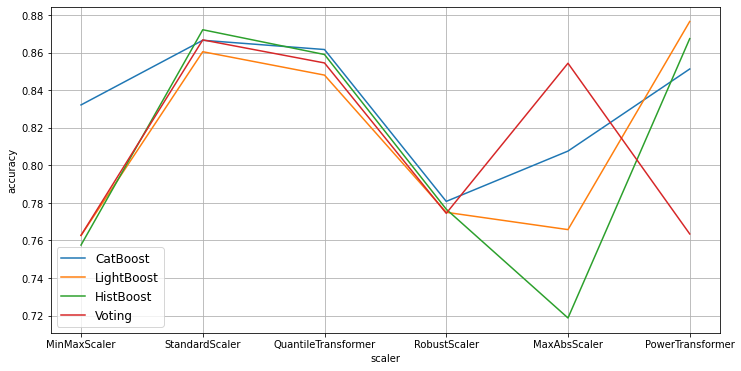

In [4]:
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_accuracy]:
    keys = i
    value = dico_accuracy[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
        
    if df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("accuracy")

plt.grid()
plt.legend(prop={'size': 12})

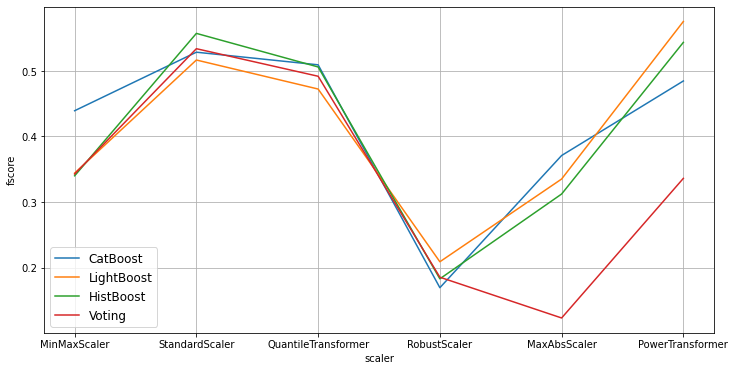

In [5]:
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_fscore]:
    keys = i
    value = dico_fscore[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
        
    if df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("fscore")

plt.grid()
plt.legend(prop={'size': 12})

# Train house 1 Test house 2 - le jour

In [6]:
dico_accuracy = {'MinMaxScaler et HistGradientBoostingClassifier': 0.6958294442436962,
 'MinMaxScaler et LGBMClassifier': 0.6903904077099903,
 'MinMaxScaler et CatBoostClassifier': 0.6836984271403332,
 'StandardScaler et HistGradientBoostingClassifier': 0.6585653937916593,
 'StandardScaler et LGBMClassifier': 0.6673221719893738,
 'StandardScaler et CatBoostClassifier': 0.6364220061464291,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7051367762909325,
 'QuantileTransformer et LGBMClassifier': 0.6927138567724302,
 'QuantileTransformer et CatBoostClassifier': 0.6451911431157522,
 'RobustScaler et HistGradientBoostingClassifier': 0.726398865817874,
 'RobustScaler et LGBMClassifier': 0.701427967782448,
 'RobustScaler et CatBoostClassifier': 0.6512384077664874,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.7085889931603027,
 'MaxAbsScaler et LGBMClassifier': 0.6978030223670225,
 'MaxAbsScaler et CatBoostClassifier': 0.6500663842589268,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7078047996760825,
 'PowerTransformer et LGBMClassifier': 0.7092866752432618,
 'PowerTransformer et CatBoostClassifier': 0.6524233785585906}

dico_accuracy_v = {'MinMaxScaler et VotingClassifier': 0.69662835055126,
 'StandardScaler et VotingClassifier': 0.6591709736004868,
 'QuantileTransformer et VotingClassifier': 0.6939032414115365,
 'RobustScaler et VotingClassifier': 0.6999360874953949,
 'MaxAbsScaler et VotingClassifier': 0.5503949510298388,
 'PowerTransformer et VotingClassifier': 0.7023439881638279}

dico_accuracy.update(dico_accuracy_v)

In [7]:
dico_fscore = {'MinMaxScaler et HistGradientBoostingClassifier': 0.7264064425516851,
 'MinMaxScaler et LGBMClassifier': 0.7287121903474616,
 'MinMaxScaler et CatBoostClassifier': 0.7232538961833508,
 'StandardScaler et HistGradientBoostingClassifier': 0.6885664780812822,
 'StandardScaler et LGBMClassifier': 0.6944826203109407,
 'StandardScaler et CatBoostClassifier': 0.6743607520832409,
 'QuantileTransformer et HistGradientBoostingClassifier': 0.7388115279565726,
 'QuantileTransformer et LGBMClassifier': 0.7300358673497457,
 'QuantileTransformer et CatBoostClassifier': 0.6872923410374775,
 'RobustScaler et HistGradientBoostingClassifier': 0.7484936920523264,
 'RobustScaler et LGBMClassifier': 0.7249677188340262,
 'RobustScaler et CatBoostClassifier': 0.6886522421466809,
 'MaxAbsScaler et HistGradientBoostingClassifier': 0.7668899769291254,
 'MaxAbsScaler et LGBMClassifier': 0.7384326089577165,
 'MaxAbsScaler et CatBoostClassifier': 0.6982543748755928,
 'PowerTransformer et HistGradientBoostingClassifier': 0.7364287163538186,
 'PowerTransformer et LGBMClassifier': 0.7357910399223578,
 'PowerTransformer et CatBoostClassifier': 0.696213099582703}

dico_fscore_v = {'MinMaxScaler et VotingClassifier': 0.7313243021767953,
 'StandardScaler et VotingClassifier': 0.6877224988290664,
 'QuantileTransformer et VotingClassifier': 0.731310697418948,
 'RobustScaler et VotingClassifier': 0.7229658622114852,
 'MaxAbsScaler et VotingClassifier': 0.6191262265750815,
 'PowerTransformer et VotingClassifier': 0.7481739322219596}

dico_fscore.update(dico_fscore_v)

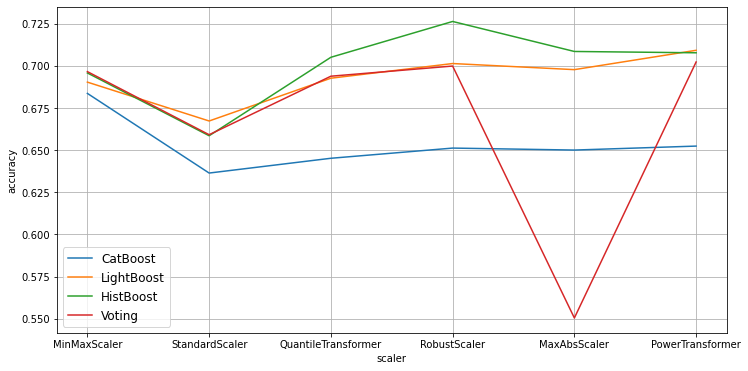

In [8]:
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_accuracy]:
    keys = i
    value = dico_accuracy[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
        
    if df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("accuracy")

plt.grid()
plt.legend(prop={'size': 12})

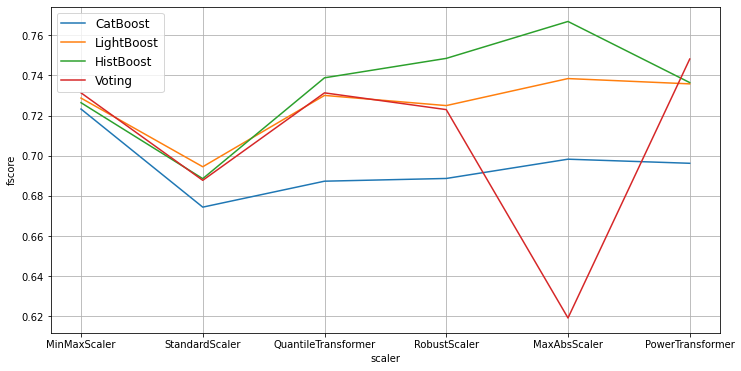

In [9]:
liste_HistGradientBoostingClassifier = list()
liste_LGBMClassifier = list()
liste_CatBoostClassifier = list()
liste_VotingClassifier = list()

for i in [*dico_fscore]:
    keys = i
    value = dico_fscore[i]
    
    keys_split = keys.split(' et ')
    df = pd.DataFrame({keys_split[1] : [value]})
    df.index = [keys_split[0]]
        
    if df.columns.tolist()[0] == 'HistGradientBoostingClassifier':
        liste_HistGradientBoostingClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'LGBMClassifier':
        liste_LGBMClassifier.append(df)
        
    elif df.columns.tolist()[0] == 'VotingClassifier':
        liste_VotingClassifier.append(df)
        
    else :
        liste_CatBoostClassifier.append(df)
        
df_HistGradientBoostingClassifier = pd.concat(liste_HistGradientBoostingClassifier)
df_LGBMClassifier = pd.concat(liste_LGBMClassifier)
df_CatBoostClassifier = pd.concat(liste_CatBoostClassifier)
df_VotingClassifier = pd.concat(liste_VotingClassifier)

plt.figure(figsize=(12,6))
plt.plot(df_CatBoostClassifier, label='CatBoost')
plt.plot(df_LGBMClassifier, label='LightBoost')
plt.plot(df_HistGradientBoostingClassifier, label='HistBoost')
plt.plot(df_VotingClassifier, label='Voting')

plt.xlabel("scaler")
plt.ylabel("fscore")

plt.grid()
plt.legend(prop={'size': 12})